## Comparing Two Weighted Graphs
Purpose of this notebook is to compare two weighted graphs and print any shortest-paths between two nodes that are different between the two graphs because of a weighted value change on an edge. We will also display the two graphs for a visual to see how they compare. 

Note: The graphs will still be isomorphic, but there is no gaurentee matplotlib will draw them the same.

In [223]:
import networkx as nx
import matplotlib.pyplot as plt

### Create Graphs

Add in the names of the nodes, and the weighted values for the original graph, and the updated weighted values

In [261]:
# Network of connections with weighted values
original_graph = {'A': {'B': 16, 'C': 9},
         'B': {'A': 16, 'D':10},
         'C': {'A':9,'D':1, 'E':7, 'G':11},
         'D': {'B':10,'C':1, 'E':2, 'F':6},
         'E': {'C':7, 'D':2,'F':7, 'G':6},
         'F': {'D':6,'E':7},
         'G': {'C':11,'E':6,}
        }

# Network of connections with updated weighted values
updated_graph = {'A': {'B': 16, 'C': 9},
         'B': {'A': 16, 'D':10},
         'C': {'A':9,'D':5, 'E':7, 'G':11},
         'D': {'B':10,'C':5, 'E':2, 'F':6},
         'E': {'C':7, 'D':2,'F':7, 'G':6},
         'F': {'D':6,'E':7},
         'G': {'C':11,'E':6,}
        }

### Validate Graphs
This next step will make sure that you have a valid graphs and you didn't misstype a weight for one connection. It does this by going through each node, and checking the weight against its neighbor and the neighbors weight against the current node. If these two are different, we print the two nodes

In [262]:
print("Checking original graph")
print([node for node,neighbors in original_graph.items() for neighbor,value in neighbors.items() if original_graph[neighbor][node] != original_graph[node][neighbor]])

print("Checking updated graph")
print([node for node,neighbors in updated_graph.items() for neighbor,value in neighbors.items() if updated_graph[neighbor][node] != updated_graph[node][neighbor]])

# '[]' is a success. Any other value will report the nodes that have issues.

Checking original graph
[]
Checking updated graph
[]


### Draw Graphs
Since they are valid graphs, we will draw both of them

In [266]:
def draw_graph(graph): 
    import networkx as nx

    G=nx.Graph()

    for node,neighbors in graph.items():
        for neighbor,value in neighbors.items():
            G.add_edge(node,neighbor,weight=value)

    #for k, v in original_graph.items():
    #    for m,n in v.items():
    #        G.add_edge(k,m,weight=n)

    pos=nx.spring_layout(G) # positions for all nodes

    # nodes
    #nx.draw_networkx_nodes(G,pos,node_size=700,label="hi")
    # edges
    #nx.draw_networkx_edges(G,pos, width=3)

    nx.draw(G,pos, with_labels=True)
    # labels
    #nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)


    plt.axis('off')
    plt.show() # display

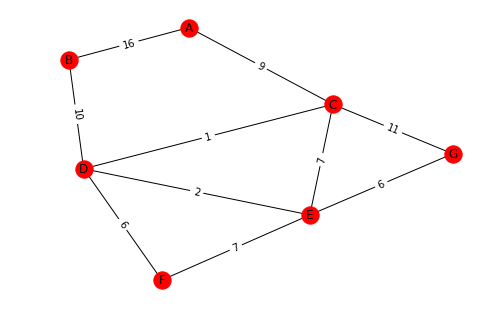

In [267]:
draw_graph(original_graph)

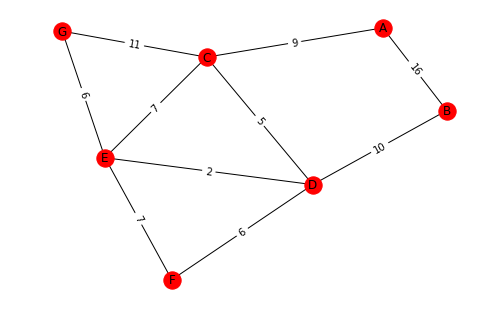

In [231]:
draw_graph(updated_graph)

### Dijkstra's Algorithm
Below is dijkstras algorithm sampled from here: https://github.com/rasbt/algorithms_in_ipython_notebooks/blob/master/ipython_nbs/search/dijkstra-algorithm.ipynb

In [232]:
def dijkstra(graph, start, destination):

    # float('inf') acts as setting an infiniate value for nodes to initialize dijkstra's algorithm
    
    # initialize costs of starting node and its neighbors
    costs = {node: float('inf') for node in graph.keys()}
    costs[start] = 0
    # and use parent_nodes to keep track of the chain of
    # nodes that make up the shortest path
    parent_nodes = {}
    for neighbor in graph[start].keys():
        costs[neighbor] = graph[start][neighbor]
        parent_nodes[neighbor] = start
    
    nodes_checked = set()
    while not len(nodes_checked) == len(graph.keys()):
        
        # get lowest cost node
        min_cost, min_cost_node = float('inf'), None
        for node in costs:
            curr_cost = costs[node]
            if curr_cost < min_cost and node not in nodes_checked:
                min_cost, min_cost_node = curr_cost, node
                
        # check if we can reach any of the lowest cost node's
        # neigbors by going through the lowest cose node
        for neighbor in graph[min_cost_node].keys():
            new_cost = min_cost + graph[min_cost_node][neighbor]
            if new_cost < costs[neighbor]:
                costs[neighbor] = new_cost
                parent_nodes[neighbor] = min_cost_node
                
        # early stopping if we visited the destination
            if neighbor == destination:
                break
        if neighbor == destination:
                break
    
        # add the node to the checked nodes
        nodes_checked.add(min_cost_node)
            
    return costs, parent_nodes

In [283]:
G=nx.Graph()

for node,neighbors in graph.items():
    for neighbor,value in neighbors.items():
        G.add_edge(node,neighbor,weight=value)

path=nx.all_pairs_dijkstra_path(G)
print(dict(path)['A']['E'])

['A', 'C', 'E']


### Create Paths for the Original Graph

First we will go though each node, and find the shortest path to every other node. We will put this into a list to be used later to compare the shortest paths for the updated graph.

In [237]:
nodes=original_graph.keys()
origional_paths = []
# Go through each node and create the shortest path
for start in nodes:
    for destination in nodes:
        if start != destination:
            costs, parent_nodes = dijkstra(original_graph, start, destination)
            current_node=destination
            path=[destination]
            while(current_node != start):
                current_node = parent_nodes[current_node]
                path.insert(0,current_node)
            origional_paths.append(path)

### Create Paths for the Updated Graph
Now we can to do the same for the updated graph as we did for the original graph.

In [238]:
nodes=updated_graph.keys()
updated_paths = []

# Go through each node and create the shortest path
for start in nodes:
    for destination in nodes:
        if start != destination:
            costs, parent_nodes = dijkstra(updated_graph, start, destination)
            current_node=destination
            path=[destination]
            while(current_node != start):
                current_node = parent_nodes[current_node]
                path.insert(0,current_node)
            updated_paths.append(path)

### Compare Graphs

Finally, we will compare both graphs, after converting them both to sets so we can find the symmetric difference.

In [239]:
origional_set = set(map(tuple, origional_paths))
updated_set = set(map(tuple, updated_paths))

# Get the symmetric difference of the two sets
origional_set ^ updated_set

# 'set()' means no difference after updated weighted values

{('B', 'D', 'C', 'G'),
 ('B', 'D', 'E', 'G'),
 ('D', 'C', 'G'),
 ('D', 'E', 'G'),
 ('E', 'C', 'A'),
 ('E', 'D', 'C', 'A'),
 ('F', 'D', 'C', 'G'),
 ('F', 'E', 'G'),
 ('G', 'C', 'A'),
 ('G', 'E', 'D', 'C', 'A')}

In [369]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.MultiGraph()
G.add_node("A")
G.add_node("B")
G.add_edge("A","B",weight=10,wire='Blue')
G.add_edge("A","B",weight=12,wire='Red')
G.add_edge("C","B",weight=4,wire='Red')
G.add_edge("C","B",weight=3,wire='Blue')

pos = nx.spring_layout(G)
#nx.draw(G, pos)

nx.dijkstra_path(G,'A','C')

h = G.subgraph(nx.dijkstra_path(G,'A','C',weight='weight'))
#print(h.edges(data=True))

tmp = h.edges(data=True)
tmp2 = [t for t in tmp] 
print(tmp2[0][0:2])


#print(nx.dijkstra_path(G,'A','C',weight='weight'))

#edge_color = nx.get_node_attributes(h,'wire') 
#nx.draw_networkx(h, edge_color=[d['wire'] for _,_, d in h.edges(data=True)])

#plt.show()

('B', 'C')
